In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import json # to work with json file format
from bs4 import BeautifulSoup

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
file = '../data/bigfoot_data.json'

In [3]:
df = pd.read_json(file, lines = True)

In [4]:
df.head()

,_id,html,time,url
0,{'$oid': '5939abbd2acdf6607095366c'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:40 2017,show_report.asp?id=13038
1,{'$oid': '5939abbd2acdf6607095366d'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=8792
2,{'$oid': '5939abbd2acdf6607095366e'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=1255
3,{'$oid': '5939abbd2acdf6607095366f'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:41 2017,show_report.asp?id=11616
4,{'$oid': '5939abbe2acdf66070953670'},"\r\n<!doctype html public ""-//w3c//dtd html 4....",Thu Jun 8 19:55:42 2017,show_report.asp?id=637


In [5]:
df.shape

(4857, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 4 columns):
_id     4857 non-null object
html    4857 non-null object
time    4857 non-null object
url     4857 non-null object
dtypes: object(4)
memory usage: 151.9+ KB


In [7]:
df['length_html_all'] = df['html'].str.len()

In [8]:
df['length_html_all'].min()

11171

## No Duplicates in the HTML or URL columns!!


In [9]:
df[df.duplicated('html')]

,_id,html,time,url,length_html_all


# Get info on tags

In [10]:
test_vals = df['html'][0]

In [11]:
soup = BeautifulSoup(test_vals, 'html.parser')

In [12]:
soup.find_all('span', {'class': 'field'})

[<span class="field">Submitted  by  witness   on Saturday, November 12, 2005.</span>,
 <span class="field">Snowmobiler has encounter in deep snow near Potter, AK</span>,
 <span class="field">YEAR:</span>,
 <span class="field">SEASON:</span>,
 <span class="field">MONTH:</span>,
 <span class="field">STATE:</span>,
 <span class="field">COUNTY:</span>,
 <span class="field">LOCATION DETAILS:</span>,
 <span class="field">NEAREST TOWN:</span>,
 <span class="field">NEAREST ROAD:</span>,
 <span class="field">OBSERVED:</span>,
 <span class="field">ALSO NOTICED:</span>,
 <span class="field">OTHER WITNESSES:</span>,
 <span class="field">OTHER STORIES:</span>,
 <span class="field">TIME AND CONDITIONS:</span>,
 <span class="field">ENVIRONMENT:</span>]

In [13]:
spans = soup.find_all('span', {'class': 'field'})

In [14]:
data = dict()

In [15]:
data['submitted'] = spans[0].text
data['title'] = spans[1].text

In [16]:
data

{'submitted': 'Submitted  by  witness   on Saturday,\xa0November\xa012,\xa02005.',
 'title': 'Snowmobiler has encounter in deep snow near Potter, AK'}

In [17]:

for sentence in soup.find_all("p"):
    if any(span in sentence for span in spans):
        text = sentence.text
        #print (text)
        #print('------\n')
        list_info = text.split(': ',1)
        print(list_info)
        data[list_info[0]] = list_info[1]
        
#if any(ext in url_string for ext in extensionsToCheck):

'''for span in spans:
    print(span["class"],span.text)'''

['YEAR', '2004']
['SEASON', 'Winter']
['MONTH', 'February']
['STATE', 'Alaska']
['COUNTY', 'Anchorage County']
['LOCATION DETAILS', 'Up near powerline clearings east of Potter Marsh in Anchorage.']
['NEAREST TOWN', 'Anchorage / Hillside']
['NEAREST ROAD', 'No real roads in the area']
['OBSERVED', 'I and two of my friends were bored one night so we decided to do a little snowmachining. Though it was illegal to snowmachine in Anchorage, there were some good trails to ride on a little north of my house.  We took off at probably 11 pm, rode up the road about a quarter mile, and cut off on the trails. It had snowed about 10 inches a few days before so there was fresh snow, with no tracks.  I was leading the way for about a half hour, then we stopped and talked for a little bit.  We took off again and kept cruising on some sort of game trail that led to an opening in the woods.  I rode off into the opening with my friends following about fifty yards behind me.  I came over this little mound 

'for span in spans:\n    print(span["class"],span.text)'

In [18]:
data

{'submitted': 'Submitted  by  witness   on Saturday,\xa0November\xa012,\xa02005.',
 'title': 'Snowmobiler has encounter in deep snow near Potter, AK',
 'YEAR': '2004',
 'SEASON': 'Winter',
 'MONTH': 'February',
 'STATE': 'Alaska',
 'COUNTY': 'Anchorage County',
 'LOCATION DETAILS': 'Up near powerline clearings east of Potter Marsh in Anchorage.',
 'NEAREST TOWN': 'Anchorage / Hillside',
 'NEAREST ROAD': 'No real roads in the area',
 'OBSERVED': 'I and two of my friends were bored one night so we decided to do a little snowmachining. Though it was illegal to snowmachine in Anchorage, there were some good trails to ride on a little north of my house.  We took off at probably 11 pm, rode up the road about a quarter mile, and cut off on the trails. It had snowed about 10 inches a few days before so there was fresh snow, with no tracks.  I was leading the way for about a half hour, then we stopped and talked for a little bit.  We took off again and kept cruising on some sort of game trail t

In [19]:
data.keys()

dict_keys(['submitted', 'title', 'YEAR', 'SEASON', 'MONTH', 'STATE', 'COUNTY', 'LOCATION DETAILS', 'NEAREST TOWN', 'NEAREST ROAD', 'OBSERVED', 'ALSO NOTICED', 'OTHER WITNESSES', 'OTHER STORIES', 'TIME AND CONDITIONS', 'ENVIRONMENT'])

In [20]:
html_df = pd.DataFrame(columns = data.keys())

In [21]:
cols = ['SUBMITTED', 'TITLE', 'YEAR', 'SEASON', 'MONTH',
                                  'STATE', 'COUNTY', 'LOCATION DETAILS', 'NEAREST TOWN',
                                  'NEAREST ROAD', 'OBSERVED', 'ALSO NOTICED',
                                  'OTHER WITNESSES', 'OTHER STORIES', 'TIME AND CONDITIONS',
                                  'ENVIRONMENT']

html_df = pd.DataFrame(columns = cols)

In [22]:
for doc in df.html:
    doc_dict = dict()
    souped_doc = BeautifulSoup(doc, 'html.parser')
    spans = souped_doc.find_all('span', {'class': 'field'})
    try:
        doc_dict['SUBMITTED'] = spans[0].text
        doc_dict['TITLE'] = spans[1].text
    except:
        continue
    for sentence in souped_doc.find_all("p"):
        if any(span in sentence for span in spans):
            text = sentence.text
            #print (text)
            #print('------\n')
            list_info = text.split(': ',1)
            #print(list_info)
            doc_dict[list_info[0]] = list_info[1]
    html_df = html_df.append({k:doc_dict[k] for k in cols if k in doc_dict}, ignore_index=True)
newcols = []
for col in html_df.columns:
    newcols.append(col.lower())
html_df.columns = newcols

In [111]:
html_df.head()

,submitted,title,year,season,month,state,county,location details,nearest town,nearest road,observed,also noticed,other witnesses,other stories,time and conditions,environment
0,"Submitted by witness on Saturday, November...",Snowmobiler has encounter in deep snow near Po...,2004,Winter,February,Alaska,Anchorage County,Up near powerline clearings east of Potter Mar...,Anchorage / Hillside,No real roads in the area,I and two of my friends were bored one night s...,"Some tracks in the snow, and a clearing in the...",My two friends were snowmachining behind me bu...,I have not heard of any other incidents in Anc...,Middle of the night. The only light was the he...,"In the middle of the woods, in a clearing cove..."
1,"Submitted by witness on Thursday, June 3, ...",Four nocturnal hikers get pelted with snow nea...,2003,Winter,December,Alaska,Anchorage County,"Few houses on the way, a power relay station. ...",Anchorage,Dowling,"Me and a couple of friends had been bored, whe...","We smelled of colonge and after shave, and one...","4. Me, w-man, warren and sean. We were at my h...",no,"Started at 11, ended at about 3-3:30. Weather ...","A pine forest, with a bog or swamp on the righ..."
2,"Submitted by witness A. M. on Tuesday, Octob...",Creature observed walking back and forth by wi...,1998,Fall,September,Alaska,Bethel County,"45 miles by air west of Lake Iliamna, Alaska i...",NaN,NaN,My hunting buddy and I were sitting on a ridge...,nothing unusual,Scouting for caribou with high quality binocul...,NaN,NaN,Call Iliamna Air taxi for lat & Long of Long L...
3,"Submitted by witness on Friday, May 6, 2005.",Fishermen find footprints east of Egegik,2004,Summer,July,Alaska,Bristol Bay County,"Approximately 95 miles east of Egegik, Alaska....",Egegik,NaN,"To whom it may concern, I am a commercial fish...",Just these foot prints and how obvious it was ...,"One other witness, and he was fishing prior to...","I've only heard of one other story, from an ol...","Approximately 12:30 pm, partially coudy/sunny.","Lake front,creek spit, gravel and sand, alder ..."
4,"Submitted by witness on Monday, November 1...",Campers' encounter just after dark in the Wran...,2000,Summer,June,Alaska,Cordova-McCarthy County,"On the main trail toward the glacier, before t...","Kennikot, Alaska",not sure,My hiking partner and I arrived late to the Ke...,I did hear what appeared to be grunting in the...,"I was the only witness, there was one other in...",None,About 12:00 Midnight / full moon / clear / dim...,This sighting was located at approximately 1 t...


In [35]:
html_df['month'] = html_df['month'].fillna('Unknown')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [65]:
eda_df = html_df[['submitted', 'year', 'season', 'month', 'state', 'county']]
eda_df[eda_df.duplicated()]

,submitted,year,season,month,state,county
673,"Submitted on Saturday, April 28, 2001.",1963,Winter,January,California,Tuolumne County
4051,"Submitted by witness S.H. on Tuesday, Decemb...",1969,Fall,November,Washington,Lewis County
4792,"Submitted by witness on Tuesday, January 3...",2004,Fall,September,NaN,NaN


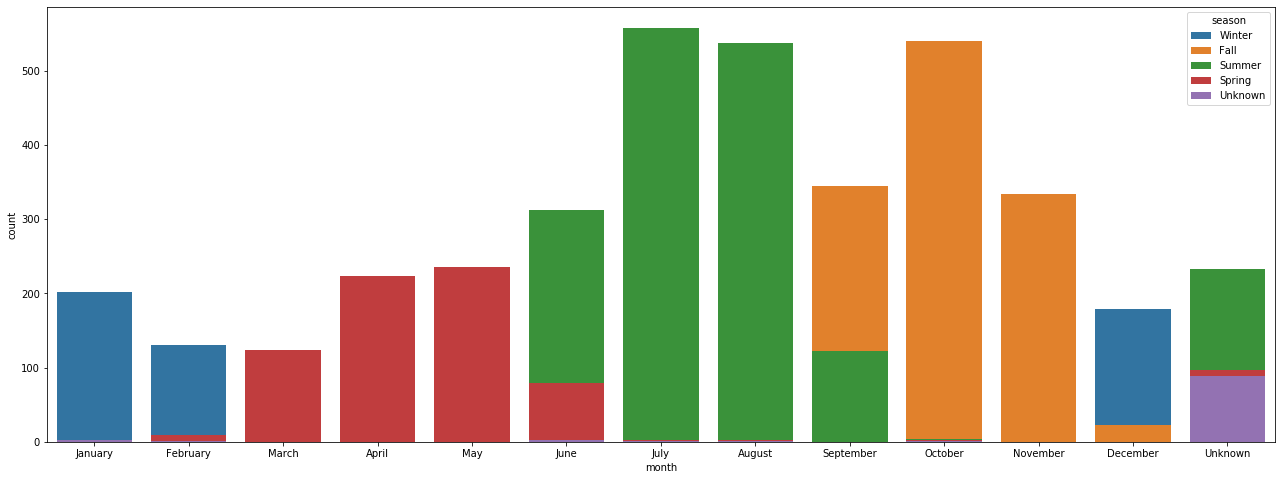

In [48]:
month_order=['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September', 'October',
       'November', 'December', 'Unknown']

fig, ax = pyplot.subplots(figsize=(22, 8))

sns.countplot(ax=ax, x="month",order=month_order,  data=eda_df, hue='season', dodge=False)
fig.savefig("../images/count_by_month.png")

In [46]:
eda_df['season'].unique()

array(['Winter', 'Fall', 'Summer', 'Spring', 'Unknown'], dtype=object)

In [66]:
eda_df['year'] = pd.to_numeric(eda_df['year'], errors='coerce')

/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
eda_df['year'] = eda_df['year'].fillna(0)

/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
eda_df[eda_df['year']<1800]=0

/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


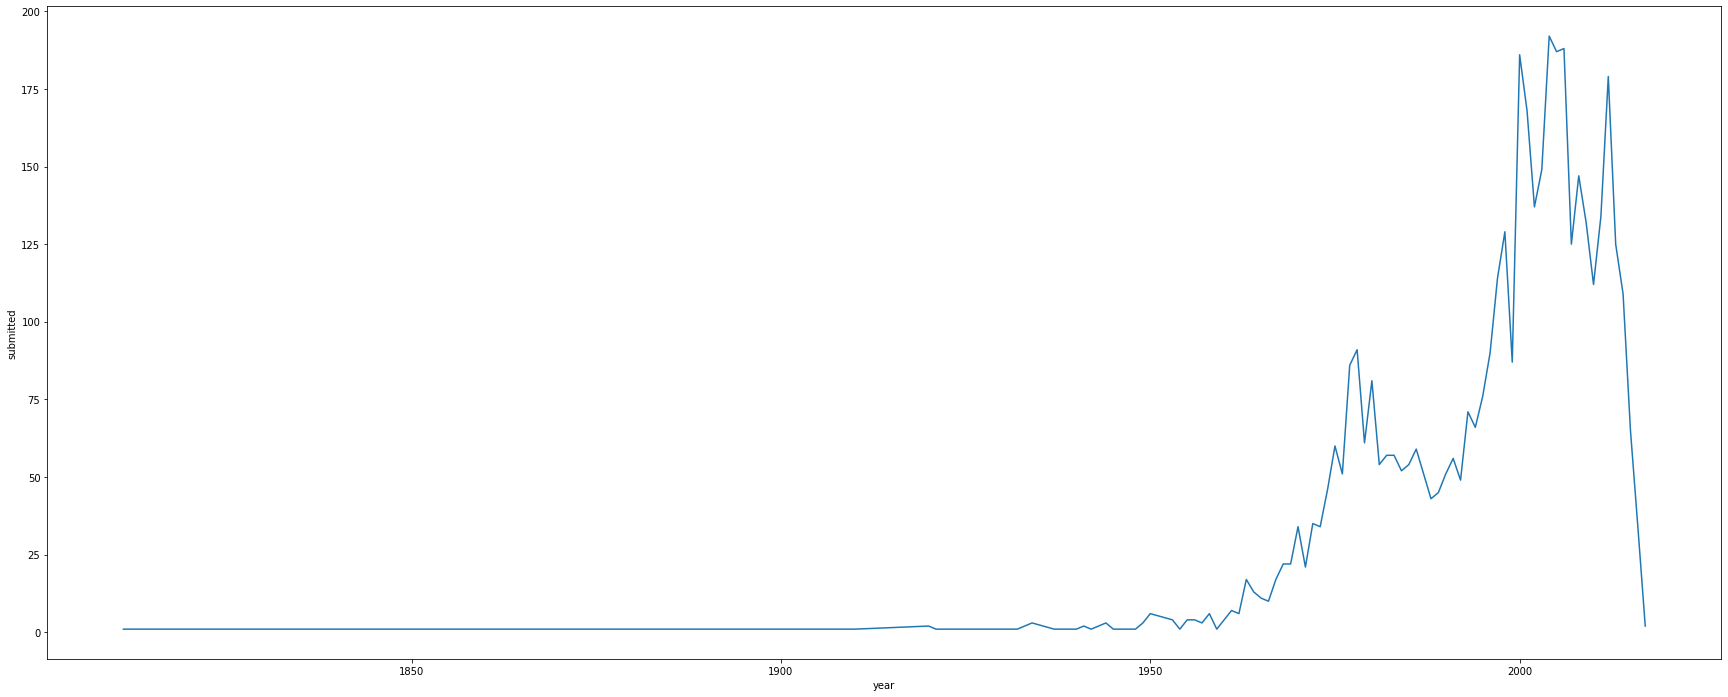

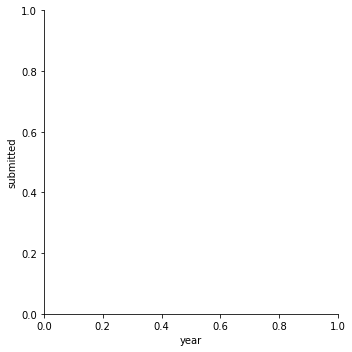

In [97]:
eda_df_year_group = pd.DataFrame(eda_df.groupby('year').count()['submitted']).reset_index()
#print(eda_df_year_group)


fig, ax = pyplot.subplots(figsize=(30, 12))

sns.relplot(ax = ax, x="year", y="submitted", kind="line",  data=eda_df_year_group[eda_df_year_group['year']!=0])
fig.savefig("../images/bigfoot_year.png")

In [95]:
eda_df['year'].unique()

array([2004., 2003., 1998., 2000., 2009., 1997.,    0., 1964., 1992.,
       2001., 1995., 2008., 1985., 1979., 1980., 1987., 1975., 2014.,
       2013., 2015., 2002., 1996., 1994., 2005., 1978., 2011., 1983.,
       2012., 2007., 1953., 1988., 2006., 1993., 1949., 1958., 1986.,
       1999., 1967., 2010., 1990., 1972., 1981., 1984., 1961., 1969.,
       1920., 1943., 1970., 2016., 2017., 1977., 1989., 1982., 1991.,
       1973., 1968., 1965., 1963., 1976., 1974., 1966., 1956., 1950.,
       1944., 1962., 1870., 1955., 1971., 1959., 1940., 1926., 1957.,
       1945., 1937., 1960., 1925., 1910., 1932., 1954., 1942., 1921.,
       1905., 1938., 1930., 1948., 1941., 1890., 1811., 1934., 1924.])

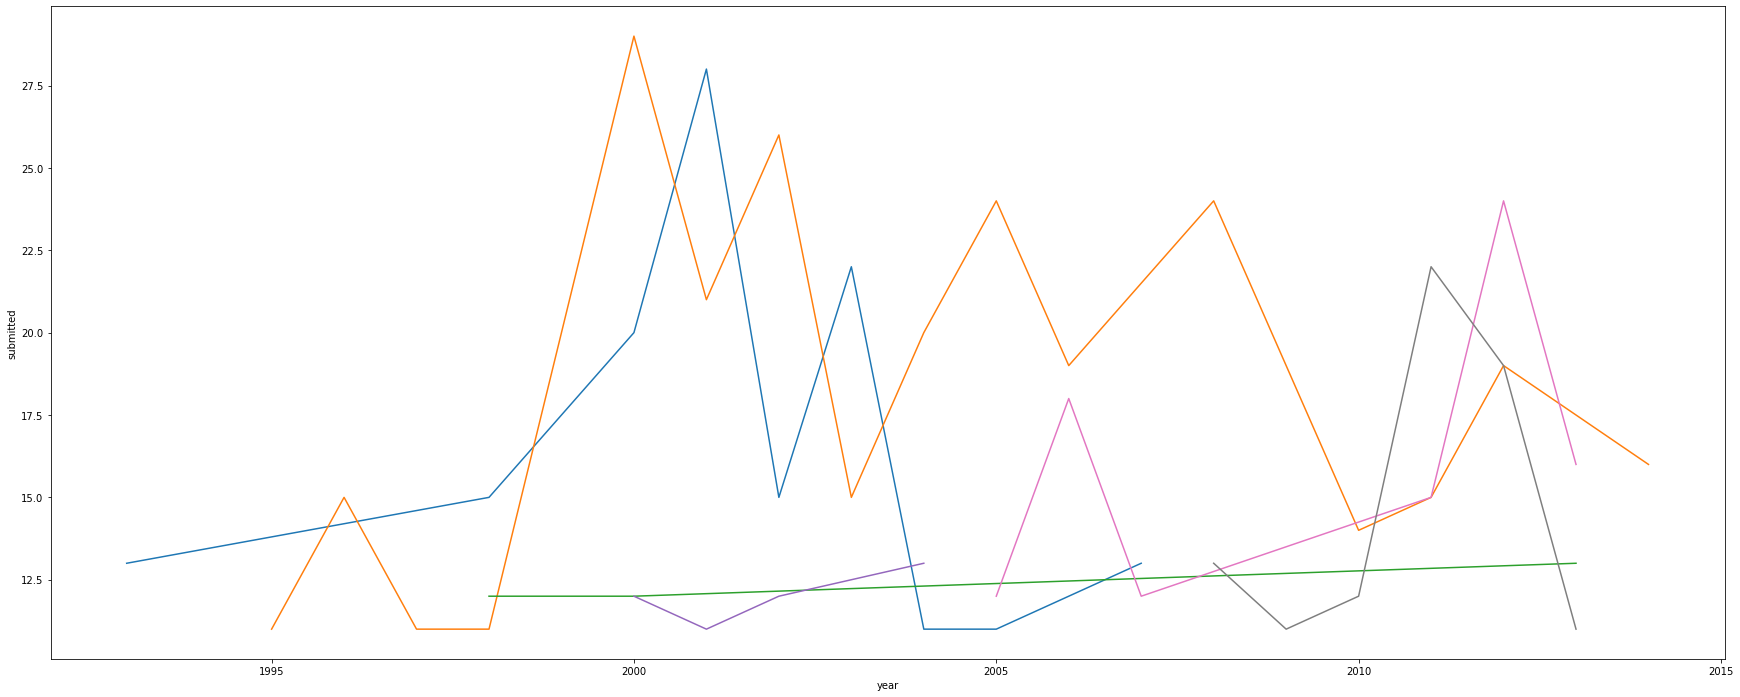

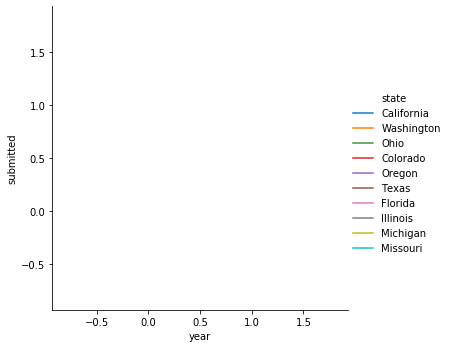

In [108]:
eda_df_year_group_state = pd.DataFrame(eda_df.groupby(['year', 'state']).count()['submitted']).reset_index()
#print(eda_df_year_group)


fig, ax = pyplot.subplots(figsize=(30, 12))

sns.relplot(ax = ax, x="year", y="submitted", kind="line", hue='state',  data=eda_df_year_group_state[(eda_df_year_group_state['year']>1990) & (eda_df_year_group_state['submitted']>10)])
#fig.savefig("../images/bigfoot_year.png")

In [103]:
eda_df_group_state = pd.DataFrame(eda_df.groupby(['state']).count()['submitted']).reset_index()

In [104]:
eda_df_group_state

,state,submitted
0,0,377
1,Alabama,87
2,Alaska,17
3,Arizona,75
4,Arkansas,83
5,California,373
6,Colorado,113
7,Connecticut,11
8,Delaware,4
9,Florida,248
